### Recurrent Neural Network

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### Some utility functions

In [4]:
def softmax(val):
    ex = np.exp(val - np.max(val))
    return ex/ex.sum(axis = 0)

In [5]:
def sigmoid(val):
    return 1 / (1 + np.exp(-val))

#### Lets plot sigmoid function

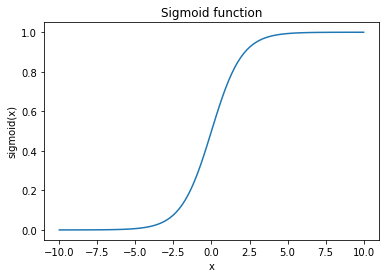

In [6]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.title("Sigmoid function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.plot(x,y)
plt.show()

In [7]:
def rnn_unit(xt, a_prev, parameters):
    
    # get the weight and bias
    
    Wax = parameters['Wax']
    Waa = parameters['Waa']
    Wya = parameters['Wya']
    ba = parameters['ba']
    by = parameters['by']
    
    # calculate a_next and yt_pred
    a_next = np.tanh(np.dot(Wax, xt)+np.dot(Waa, a_prev)+ba)
    yt_pred = softmax(np.dot(Wya, a_next)+by)
    
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache
    

In [8]:
np.random.seed(1)

xt = np.random.randn(3,10)  # (nx, m)
a_prev = np.random.randn(5,10) # (na, m)
Waa = np.random.randn(5,5)  #(na, na)
Wax = np.random.randn(5,3)  #(na, nx)
Wya = np.random.randn(2,5)  #(ny, na)
ba = np.random.randn(5,1)   #(na, 1)
by = np.random.randn(2,1)   #(ny, 1)

parameters = {'Waa':Waa,'Wax':Wax, 'Wya':Wya, 'ba':ba, 'by':by}
a_next, yt_pred, cache = rnn_unit(xt, a_prev, parameters)
a_next

array([[ 0.95442347, -0.97959841, -0.77682357, -0.85960496,  0.2996283 ,
        -0.72828789,  0.70341981,  0.396781  ,  0.64215271, -0.68720152],
       [-0.77817006, -0.96939535, -0.90158668, -0.89269334, -0.94794605,
        -0.62569074, -0.7847199 ,  0.73807292,  0.40638533, -0.49874722],
       [ 0.34337788, -0.99997631, -0.99692205, -0.98133709, -0.93123291,
        -0.99802557, -0.99662894, -0.93641136, -0.25153222,  0.54770565],
       [-0.85404662,  0.97190276,  0.60516394,  0.65999969, -0.68038654,
         0.09222782,  0.34729991,  0.41705046, -0.44431726,  0.74395075],
       [ 0.59584544,  0.18141802,  0.61311866,  0.99808218,  0.85016201,
         0.99980978, -0.18887155,  0.99815551,  0.6531151 ,  0.82872037]])

### Forward Propagation

In [9]:
def forward_propagation(x, a0, paramaters):
    
    caches = []
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
    # initializing a and y with zeros
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))
    
    a_next = a0
    # loop over all time steps
    for t in range(T_x):
        a_next, yt_pred, cache = rnn_unit(x[:,:,t], a_next, parameters)
        
        # new hidden state
        a[:,:,t] = a_next
        
        y_pred[:,:,t] = yt_pred
        
        caches.append(cache)
    
    caches = (caches, x)
    return a, y_pred, caches
        

In [10]:
np.random.seed(1)
x = np.random.randn(3,10,4) # T_x = 4
a0 = np.random.randn(5,10) # (na, m)
Waa = np.random.randn(5,5) #(na, na)
Wax = np.random.randn(5,3) #(na, nx)
Wya = np.random.randn(2, 5) #(ny, na)
ba = np.random.randn(5,1) #(na, 1)
by = np.random.randn(2,1) #(ny, 1)

parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}
a, y_pred, caches = forward_propagation(x, a0, parameters)
a[4][1]

print(len(caches))


2


### Back propagation

In [11]:
def rnn_backpropagation(da_next, cache):
    
    # get the values from the caches
    
    (a_next, a_prev, xt, parameters) = cache
    
    # retrieve the parameters value
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    dtanh = (1 - a_next **2) * da_next
    
    # gradient of tanh w.r.t Wax
    
    dxt = np.dot(Wax.T, dtanh)
    dWax = np.dot(dtanh, xt.T)
    
    # gradient wrt Waa
    da_prev = np.dot(Waa.T, dtanh)
    dWaa = np.dot(dtanh, a_prev.T)
    
    # gradient wrt b
    dba = np.sum(dtanh, axis = 1, keepdims = 1)
    # store the gradients
    gradients = {"dxt": dxt, "da_prev": da_prev, "dWax": dWax, "dWaa": dWaa, "dba": dba}
    
    return gradients

In [12]:
### Test cases

np.random.seed(1)
xt = np.random.randn(3,10)
a_prev = np.random.randn(5,10)
Wax = np.random.randn(5,3)
Waa = np.random.randn(5,5)
Wya = np.random.randn(2,5)
b = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Wax": Wax, "Waa": Waa, "Wya": Wya, "ba": ba, "by": by}
da_next = np.random.randn(5,10)
gradients = rnn_backpropagation(da_next, cache)
print("gradients[\"dxt\"][1][2] =", gradients["dxt"][1][2])
print("gradients[\"da_prev\"][2][3] =", gradients["da_prev"][2][3])

gradients["dxt"][1][2] = 1.3653821219712916
gradients["da_prev"][2][3] = -0.04357779106461625


#### Back propagation for entire time steps

In [13]:
def rnn_entire_backward(da, caches):
    
    (caches, x)  = caches
    (a1, x0, x1, paramaters) = caches[0]
    
    n_a, m, T_x = da.shape
    n_x, m = x1.shape
    
    dx = np.zeros((n_x, m, T_x))
    dWax = np.zeros((n_a, n_x))
    dWaa = np.zeros((n_a, n_a))
    dba = np.zeros((n_a, 1))
    da0 = np.zeros((n_a, m))
    da_prevt = np.zeros((n_a, m))
    
    
    # loop through all the time steps
    
    for t in reversed(range(T_x)):
        
        gradients = rnn_backpropagation(da[:,:,t] + da_prevt, caches[t])
        
        # get all the derivatives we calculated before
        dxt, da_prevt, dWaxt, dWaat, dbat = gradients["dxt"], gradients["da_prev"], gradients["dWax"], gradients["dWaa"], gradients["dba"]
        
        dx[:,:,t] = dxt
        dWax += dWaxt
        dWaa += dWaat
        dba += dbat
        
        da0 = da_prevt
        
        gradients = {"dx": dx, "da0": da0, "dWax": dWax, "dWaa": dWaa,"dba": dba}
    
    return gradients
        
    

In [16]:
np.random.seed(1)
x = np.random.randn(3,10,4)
a0 = np.random.randn(5,10)
Wax = np.random.randn(5,3)
Waa = np.random.randn(5,5)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)

parameters = {"Wax": Wax, "Waa": Waa, "Wya": Wya, "ba": ba, "by": by}
a, y, caches = forward_propagation(x, a0, parameters)
da = np.random.randn(5, 10, 4)
gradients = rnn_entire_backward(da, caches)


print("gradients[\"dx\"][1][2] =", gradients["dx"][1][2])
print("gradients[\"dx\"].shape =", gradients["dx"].shape)
print("gradients[\"da0\"][2][3] =", gradients["da0"][2][3])
print("gradients[\"da0\"].shape =", gradients["da0"].shape)
print("gradients[\"dWax\"][3][1] =", gradients["dWax"][3][1])
print("gradients[\"dWax\"].shape =", gradients["dWax"].shape)
print("gradients[\"dWaa\"][1][2] =", gradients["dWaa"][1][2])
print("gradients[\"dWaa\"].shape =", gradients["dWaa"].shape)
print("gradients[\"dba\"][4] =", gradients["dba"][4])
print("gradients[\"dba\"].shape =", gradients["dba"].shape)

gradients["dx"][1][2] = [-2.07101689 -0.59255627  0.02466855  0.01483317]
gradients["dx"].shape = (3, 10, 4)
gradients["da0"][2][3] = -0.31494237512664996
gradients["da0"].shape = (5, 10)
gradients["dWax"][3][1] = 11.264104496527777
gradients["dWax"].shape = (5, 3)
gradients["dWaa"][1][2] = 2.303333126579893
gradients["dWaa"].shape = (5, 5)
gradients["dba"][4] = [-0.74747722]
gradients["dba"].shape = (5, 1)
